In [4]:
! more -n 10 G:/python/pydata-book-2nd-edition/datasets/babynames/yob1880.txt

无效参数 - /python


In [37]:
pd.options.display.max_rows = 10
%matplotlib notebook

In [5]:
import pandas as pd

In [12]:
names1880 = pd.read_csv('G:/python/pydata-book-2nd-edition/datasets/babynames/yob1880.txt',
                       names=['name', 'sex', 'births'])

In [31]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [16]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [26]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'G:/python/pydata-book-2nd-edition/datasets/babynames/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# 将所有内容粘进一个DataFrame
names = pd.concat(pieces, ignore_index=True)

In [32]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [33]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [35]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<IPython.core.display.Javascript object>


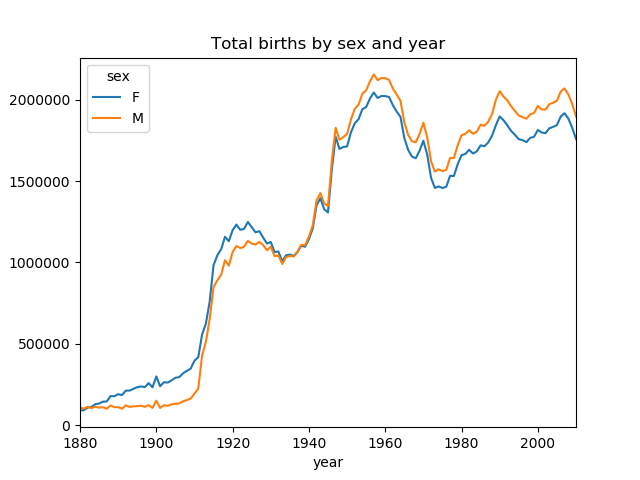

In [38]:
total_births.plot(title='Total births by sex and year')

In [42]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

In [43]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [44]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003
